<a href="https://colab.research.google.com/github/TaniyaSingh4/Sparks_task/blob/master/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
URL="http://bit.ly/w-data"
data=pd.read_csv(URL)

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.shape

(25, 2)

In [ ]:
data.size

50

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

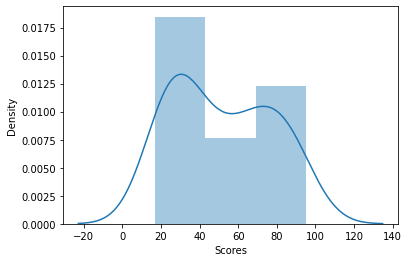

In [ ]:
sns.distplot(data['Scores']);

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


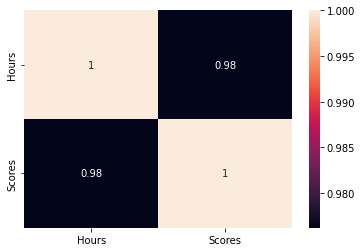

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()

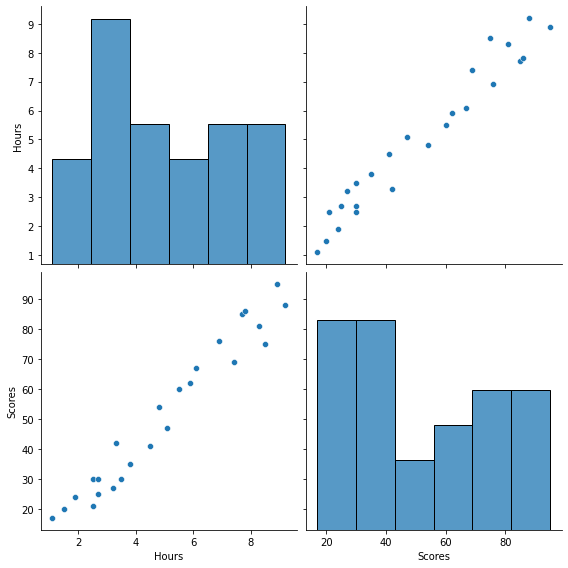

In [ ]:
sns.pairplot(data,height=4 , aspect=1 )

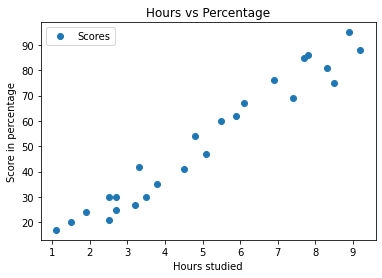

In [ ]:
data.plot(x="Hours",y="Scores",style='o')
plt.xlabel("Hours studied")
plt.ylabel("Score in percentage")
plt.title("Hours vs Percentage")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X=data[['Hours']]
y=data['Scores']

In [ ]:


X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)



In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Intercept:',lr.intercept_)
print('Coefficient:',lr.coef_)

Intercept: 1.989423110974684
Coefficient: [9.83544438]


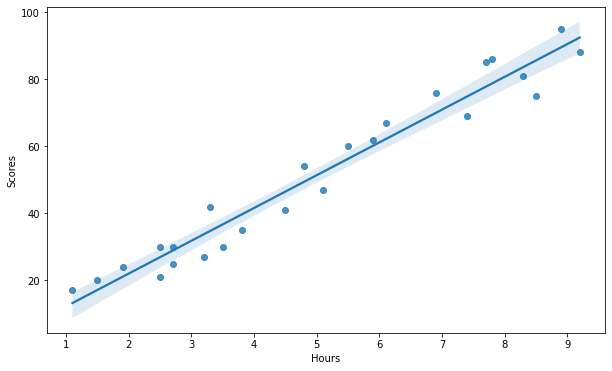

In [ ]:
plt.figure(figsize=(10,6));
sns.regplot(X,y);
plt.show();

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:


lr_diff=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred})
lr_diff.head()



,Actual value,Predicted value
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


In [ ]:


from sklearn.metrics import r2_score
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)
a=r2_score(y_train,y_train_pred)
b=r2_score(y_test,y_test_pred)
print("Training={} Testing={}".format(a,b))



Training=0.9519568836485192 Testing=0.9050356232459791


In [ ]:
from sklearn import metrics
meanAbErr=metrics.mean_absolute_error(y_test,y_test_pred)
meanSqErr=metrics.mean_squared_error(y_test,y_test_pred)
rootMeanSquare=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))


print('Mean absolute error:',meanAbErr)
print('mean square error:', meanSqErr)
print('root mean square error:', rootMeanSquare)

Mean absolute error: 4.140342096254413
mean square error: 20.64145693125399
root mean square error: 4.543287018366107
